**SC62614_Indra Fiqi Ripani_Machine Learning**

**Heart Disease Dataset**

# **Data Preprocessing**

### **Mount Google Drive**

In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Import Library Python**

In [59]:
# Data Manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

# Library untuk Machine Learning Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import BaggingClassifier

### **Import Dataset**

In [60]:
csv_path = '/content/drive/MyDrive/GoogleColab/heart.csv'

# Membaca data Excel ke dalam DataFrame Pandas
df = pd.read_csv(csv_path)

# Menampilkan 10 baris pertama dari DataFrame
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [61]:
# Menampilkan 10 baris terakhir dari DataFrame
df.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1015,58,1,0,128,216,0,0,131,1,2.2,1,3,3,0
1016,65,1,3,138,282,1,0,174,0,1.4,1,1,2,0
1017,53,1,0,123,282,0,1,95,1,2.0,1,2,3,0
1018,41,1,0,110,172,0,0,158,0,0.0,2,0,3,0
1019,47,1,0,112,204,0,1,143,0,0.1,2,0,2,1
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


### **Informasi Heart Disease Dataset**

Ini dilakukan untuk melihat informasi dataset, seperti jumlah kolom dan baris, nilai minimum dan maksimum dari setiap kolom, dan rata-rata nilainya.

In [62]:
print("Tipe Data Kolom:")
print(df.dtypes)

jumlah_baris, jumlah_kolom = df.shape
print(f"\nJumlah Baris : {jumlah_baris}")
print(f"Jumlah Kolom : {jumlah_kolom}")

print("\nInformasi DataFrame:")
print(df.info())

Tipe Data Kolom:
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Jumlah Baris : 1025
Jumlah Kolom : 14

Informasi DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca       

Dapat diketahui bahwasanya dataset memiliki 14 kolom dan 1025 baris dengan 13 kolom bertipe data integer dan 1 kolom bertipe data float.

In [63]:
# Describe Dataset
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


## **Data Preparation**

### **Memeriksa Missing Value pada Dataset**

<Axes: >

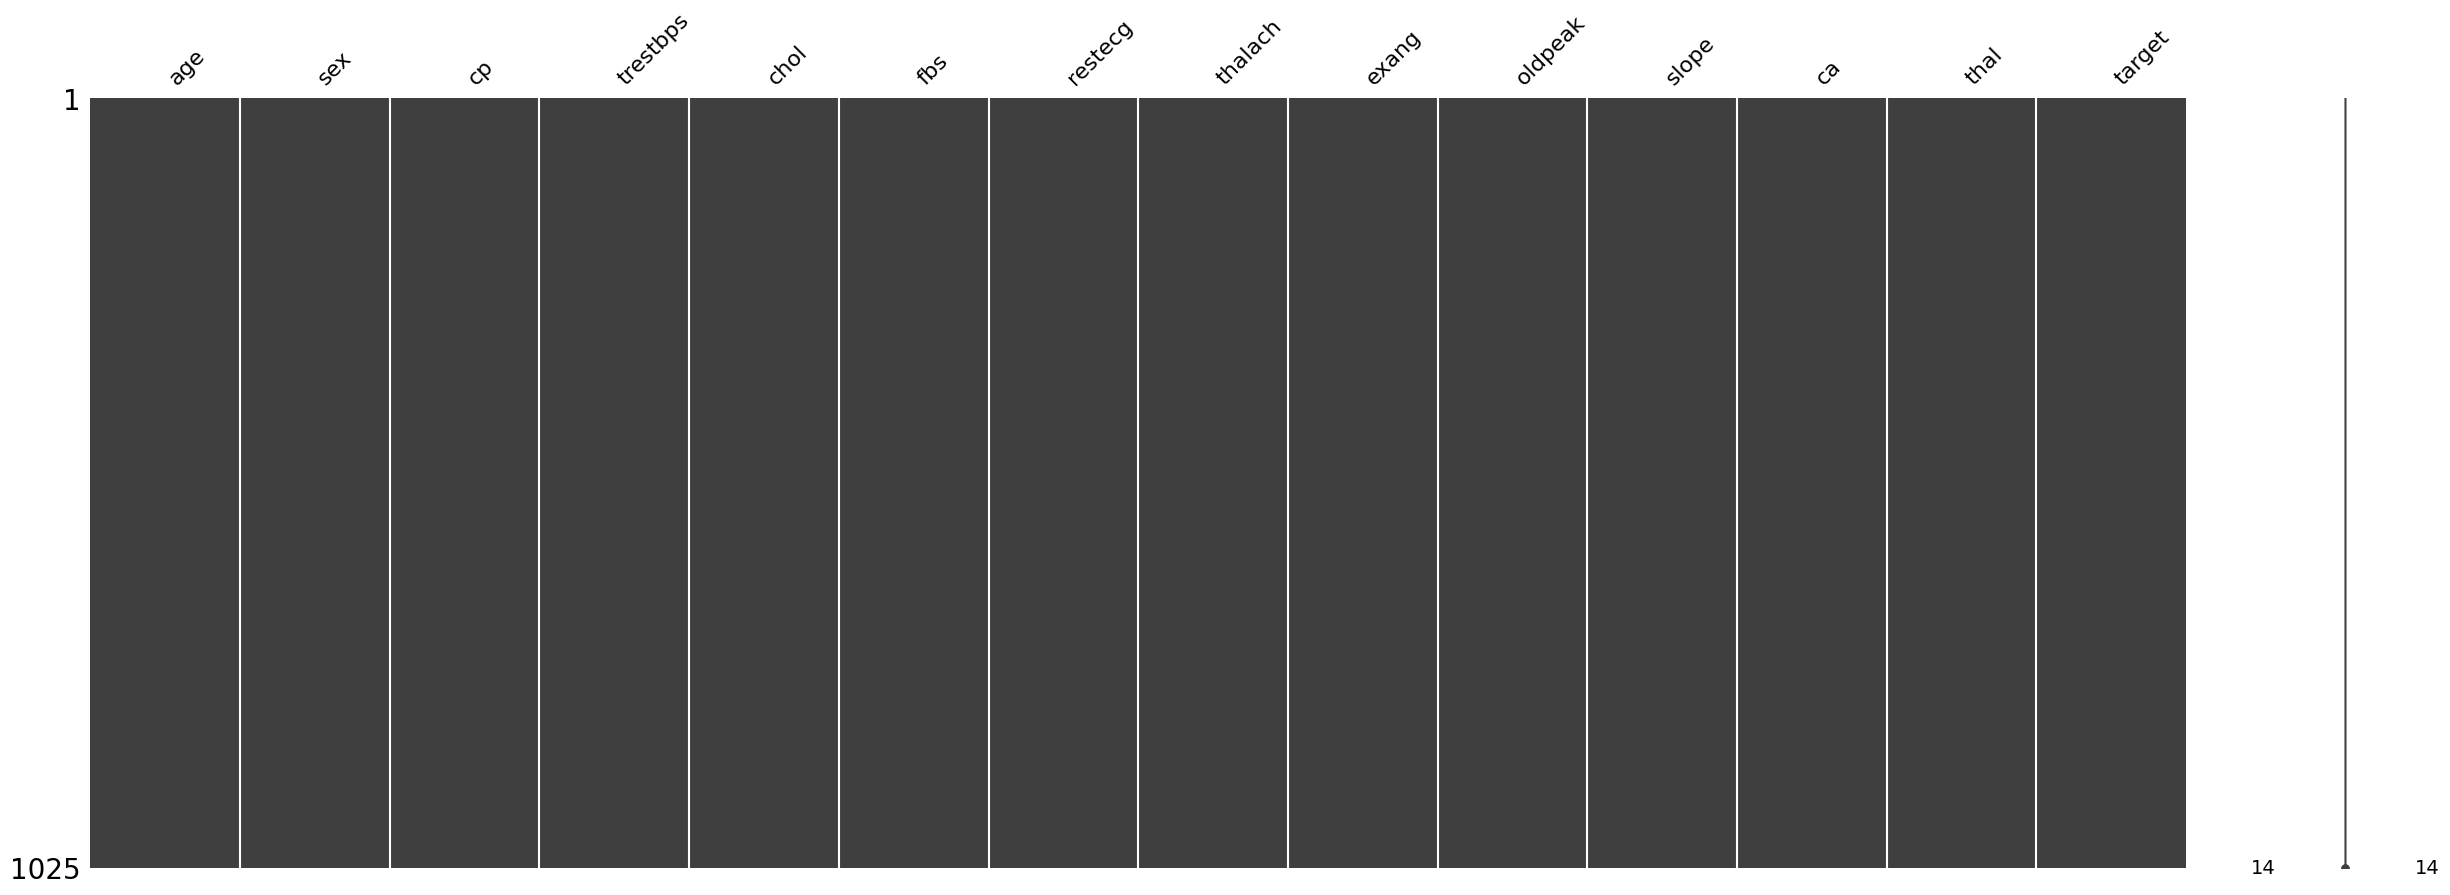

In [64]:
# Memeriksa missing value dengan visualisasi grafik plot
missingno.matrix(df, figsize = (30,10))

In [65]:
# Cara alternatif memeriksa missing value dengan menghitung jumlah nilai yang hilang dalam setiap kolom dataframe
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Dapat diketahui dengan pasti bahwa pada dataset tidak memiliki missing value.

### **Memeriksa Duplicate Value pada Dataset**

In [66]:
# Memeriksa duplikat dalam dataframe
duplicate_rows = df.duplicated().sum()

# Menampilkan hasil
if duplicate_rows == 0:
    print("Tidak ada nilai duplikat dalam dataset.")
else:
    print("Nilai duplikat dalam dataset ditemukan sebanyak :", duplicate_rows)

Nilai duplikat dalam dataset ditemukan sebanyak : 723


Berdasarkan pengecekkan, terdapat data duplikat sebanyak 723 baris. Data duplikat tersebut akan dihapus. Ini dilakukan untuk menjaga konsistensi, efisiensi penyimpanan, dan kualitas analisis yang lebih baik. Menghapus duplikat juga memastikan konsistensi hasil dan menghindari overfitting.

In [67]:
# Menghapus baris dengan nilai duplikat dari dataframe
df = df.drop_duplicates()

# Menampilkan informasi terbaru dari dataframe setelah penghapusan nilai duplikat
print("Informasi DataFrame Terbaru:")
print(df.info())

duplicate_rows = df.duplicated().sum()
print("\nNilai duplikat dalam dataset ditemukan sebanyak :", duplicate_rows)

Informasi DataFrame Terbaru:
<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB
None

Nilai duplikat dalam dataset ditemukan sebanyak : 0


### **Memeriksa Outlier pada Dataset**

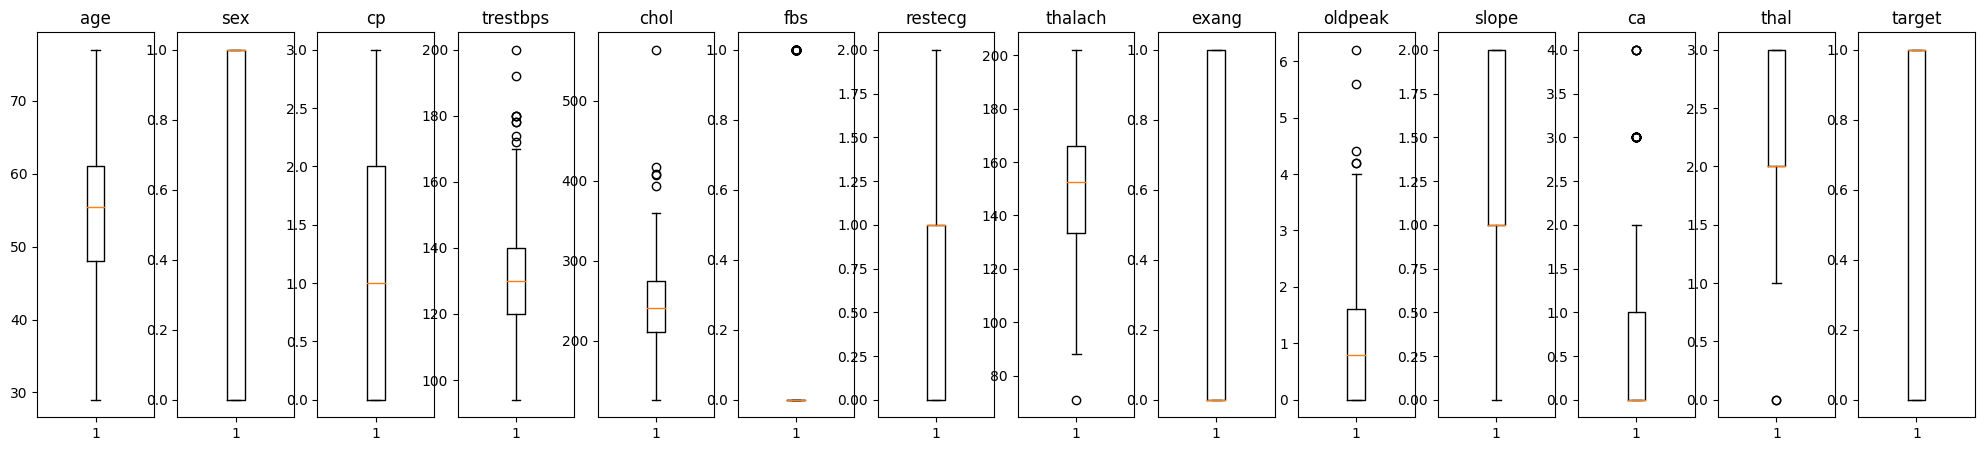

In [68]:
fig, axs = plt.subplots(ncols=len(df.columns), figsize=(25,5))
for i, col in enumerate(df.columns):
    axs[i].boxplot(df[col])
    axs[i].set_title(col)
plt.show()

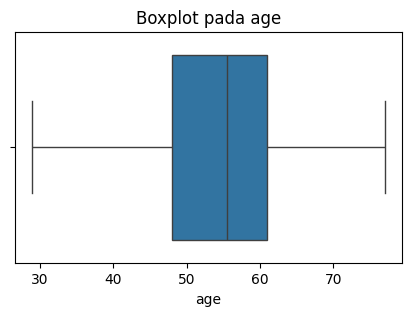

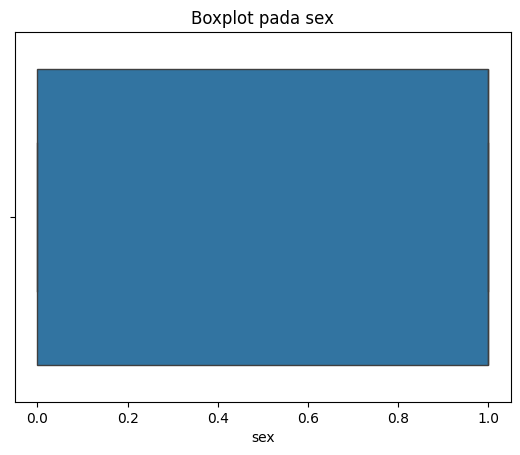

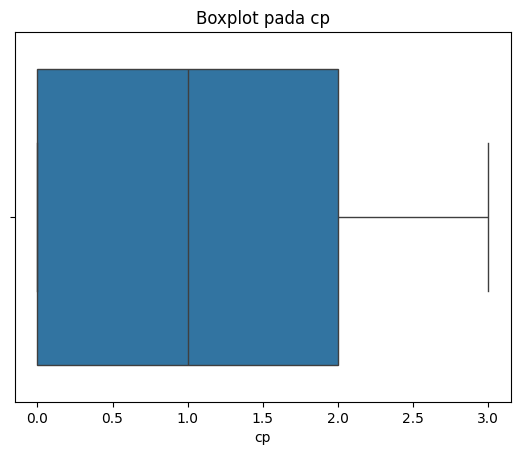

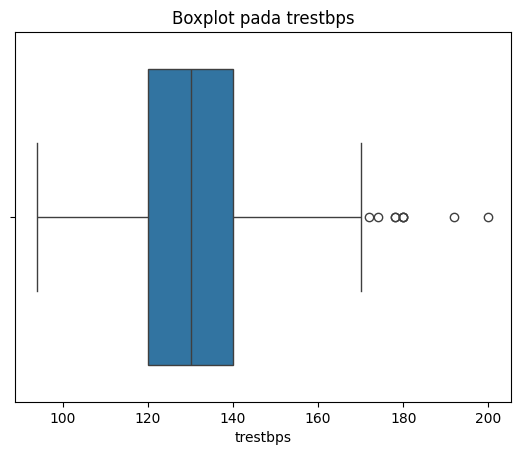

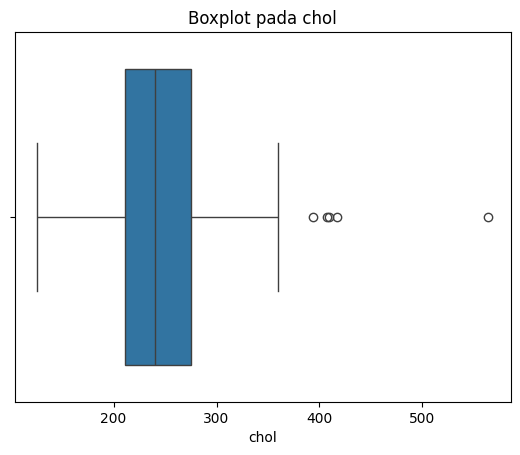

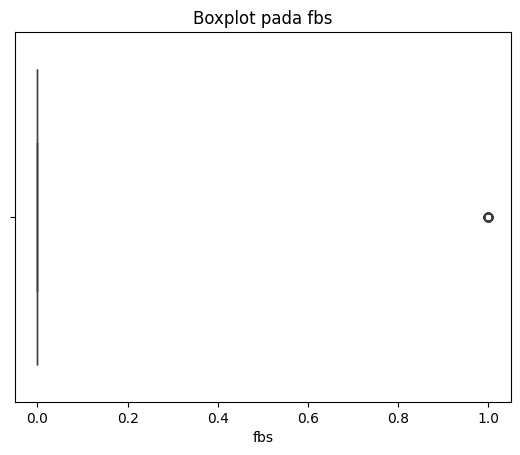

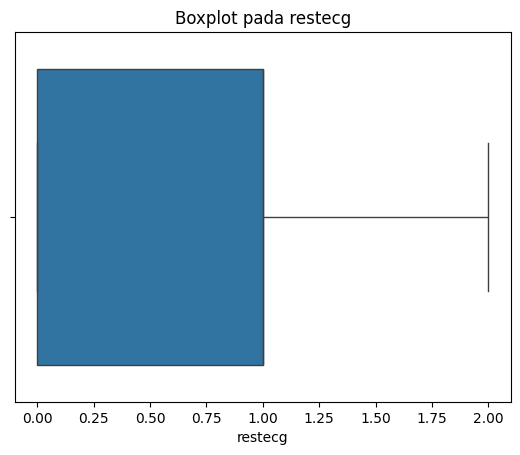

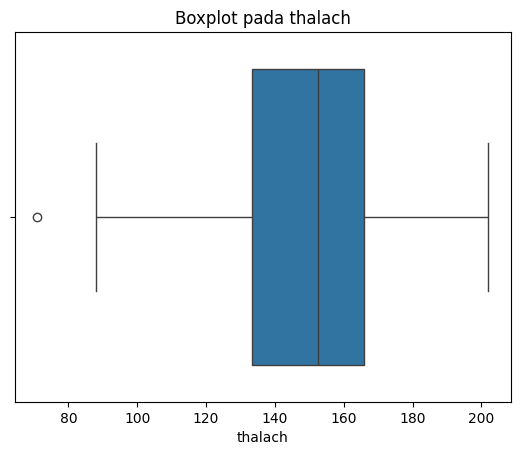

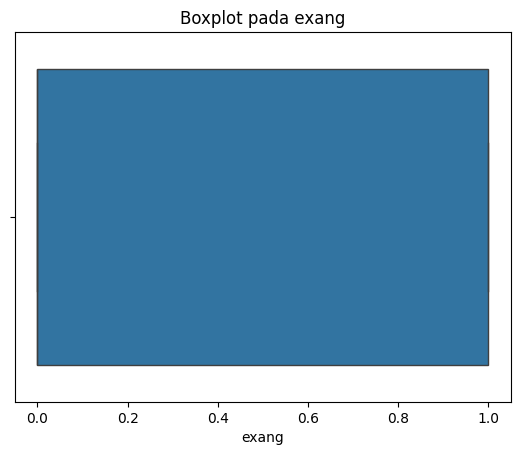

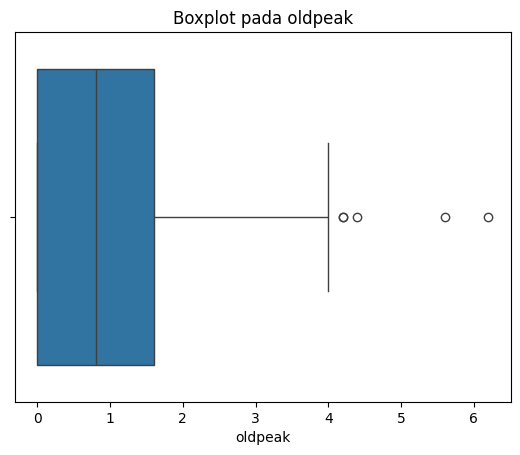

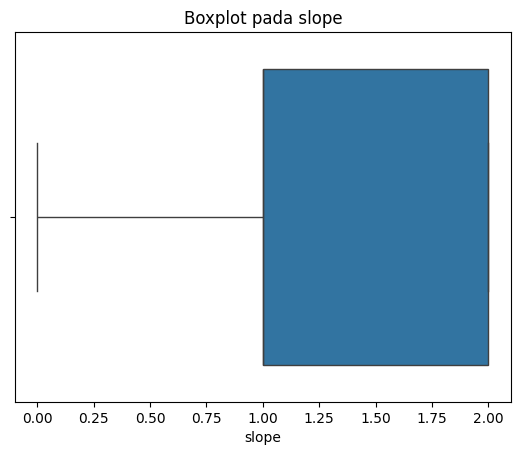

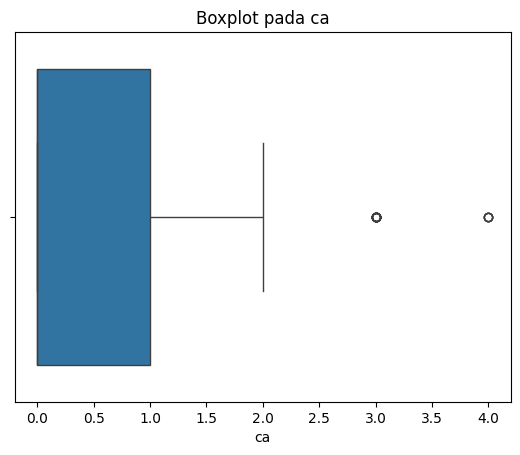

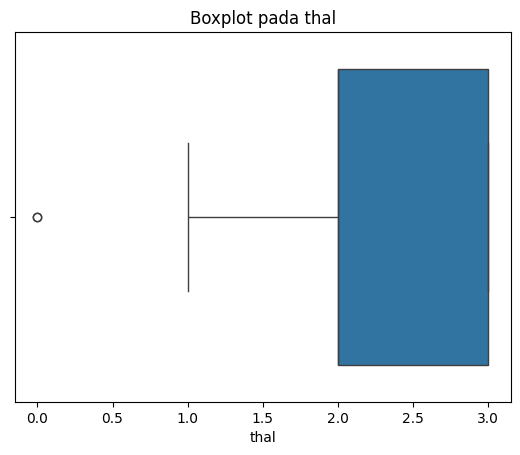

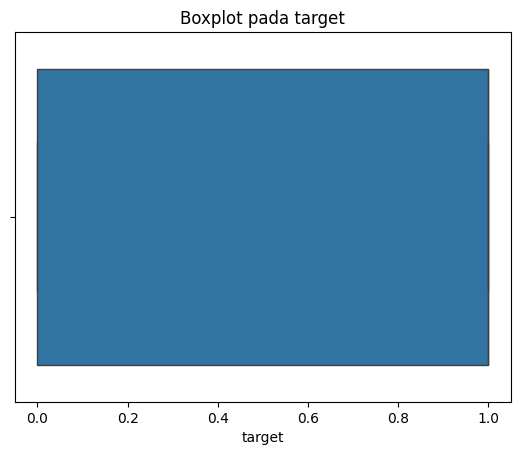

In [69]:
# Alternatif visualisasi outlier pada setiap kolom

# List kolom untuk membuat boxplot
numerical_features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

# Set ukuran gambar
plt.figure(figsize = (5, 3))

# Buat boxplot dari masing masing kolom untuk mengecek outlier
for feature in numerical_features:
    sns.boxplot( x = df[feature], data = df)
    plt.title(f'Boxplot pada {feature}')
    plt.show()

Berdasarkan boxplot di atas, outlier terdapat pada kolom trestbps, chol, fbs, thalach, oldpeak, ca, dan thal.

Outlier pada kolom ca dan thal perlu dihilangkan karena nilai kolom ca seharusnya antara 0 - 3 dan pada kolom thal seharusnya  nilainya 1, 2, atau 3. sehingga diluar dari range tersebut perlu untuk dieliminasi.

In [70]:
# Menghapus outliers pada kolom ca dan thal
df = df[(df['ca'] <= 3) & (df['thal'] != 0)]

# Memeriksa apakah masih ada outliers dengan nilai ca > 3 dan thal = 0
outliers_exist = df.loc[(df['ca'] > 3) & (df['thal'] == 0)].shape[0] > 0

if outliers_exist:
    print("Masih ada outliers dengan nilai ca > 3 dan thal = 0.")
else:
    print("Tidak ada outliers dengan nilai ca > 3 dan thal = 0.")

Tidak ada outliers dengan nilai ca > 3 dan thal = 0.


In [71]:
# Menentukan batas atas dan batas bawah
q1 = np.percentile(df['chol'], 25)
q3 = np.percentile(df['chol'], 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Menghapus outliers pada kolom chol
df = df[(df['chol'] >= lower_bound) & (df['chol'] <= upper_bound)]

# Memeriksa apakah masih ada outliers dalam kolom 'chol'
outliers_exist = df.loc[(df['chol'] < lower_bound) | (df['chol'] > upper_bound)].shape[0] > 0

if outliers_exist:
    print("Masih ada outliers dalam kolom 'chol'.")
else:
    print("Tidak ada outliers dalam kolom 'chol'.")

Tidak ada outliers dalam kolom 'chol'.


In [72]:
# Menentukan batas atas dan batas bawah
q1 = np.percentile(df['trestbps'], 25)
q3 = np.percentile(df['trestbps'], 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Menghapus outliers pada kolom trestbps
df = df[(df['trestbps'] >= lower_bound) & (df['trestbps'] <= upper_bound)]

# Memeriksa apakah masih ada outliers dalam kolom 'trestbps'
outliers_exist = df.loc[(df['trestbps'] < lower_bound) | (df['trestbps'] > upper_bound)].shape[0] > 0

if outliers_exist:
    print("Masih ada outliers dalam kolom 'trestbps'.")
else:
    print("Tidak ada outliers dalam kolom 'trestbps'.")

Tidak ada outliers dalam kolom 'trestbps'.


In [73]:
# Menentukan batas atas dan batas bawah
q1 = np.percentile(df['thalach'], 25)
q3 = np.percentile(df['thalach'], 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Menghapus outliers pada kolom thalach
df = df[(df['thalach'] >= lower_bound) & (df['thalach'] <= upper_bound)]

# Memeriksa apakah masih ada outliers dalam kolom 'thalach'
outliers_exist = df.loc[(df['thalach'] < lower_bound) | (df['thalach'] > upper_bound)].shape[0] > 0

if outliers_exist:
    print("Masih ada outliers dalam kolom 'thalach'.")
else:
    print("Tidak ada outliers dalam kolom 'thalach'.")

Tidak ada outliers dalam kolom 'thalach'.


In [74]:
# Menentukan batas atas dan batas bawah
q1 = np.percentile(df['oldpeak'], 25)
q3 = np.percentile(df['oldpeak'], 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Menghapus outliers pada kolom oldpeak
df = df[(df['oldpeak'] >= lower_bound) & (df['oldpeak'] <= upper_bound)]

# Memeriksa apakah masih ada outliers dalam kolom 'oldpeak'
outliers_exist = df.loc[(df['oldpeak'] < lower_bound) | (df['oldpeak'] > upper_bound)].shape[0] > 0

if outliers_exist:
    print("Masih ada outliers dalam kolom 'oldpeak'.")
else:
    print("Tidak ada outliers dalam kolom 'oldpeak'.")

Tidak ada outliers dalam kolom 'oldpeak'.


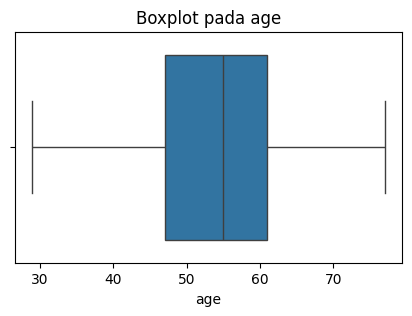

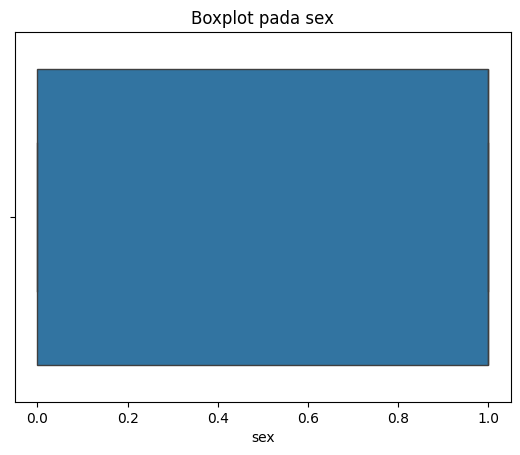

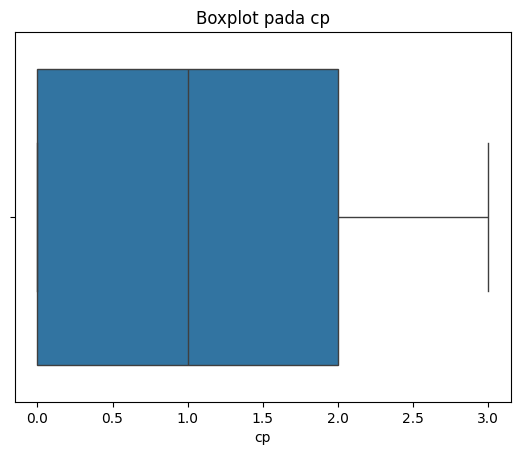

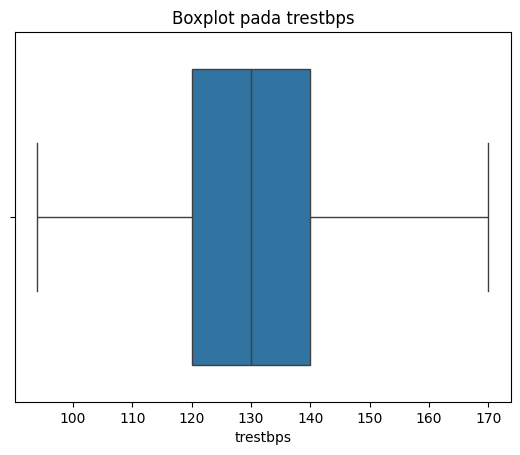

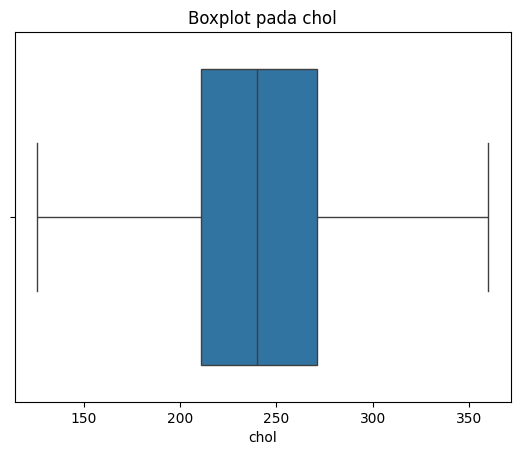

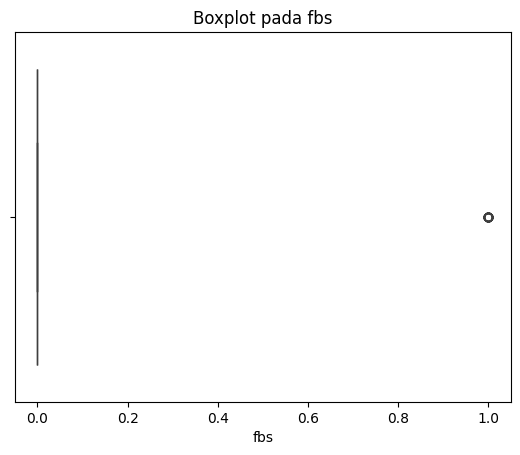

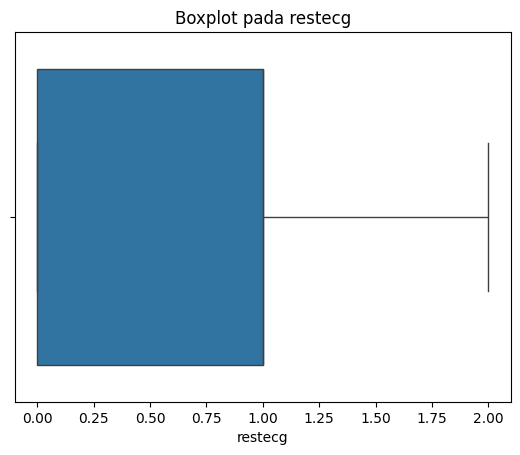

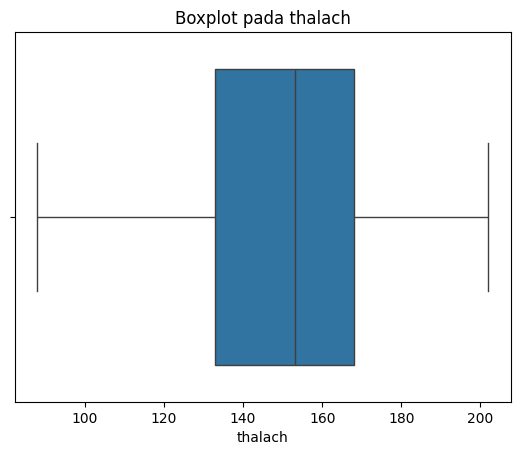

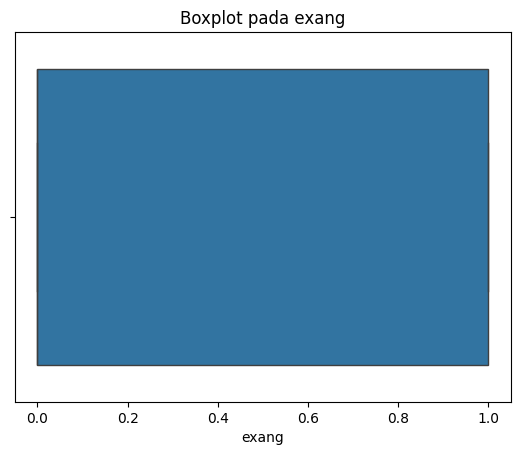

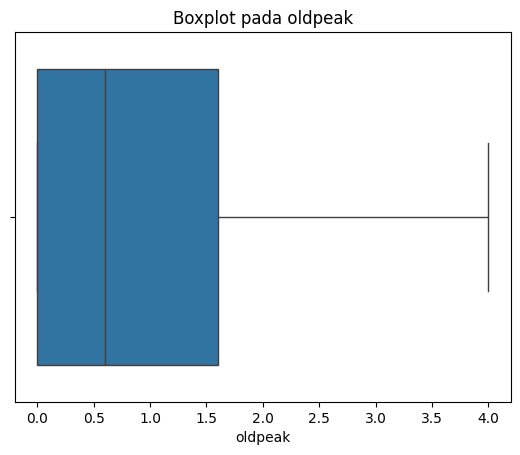

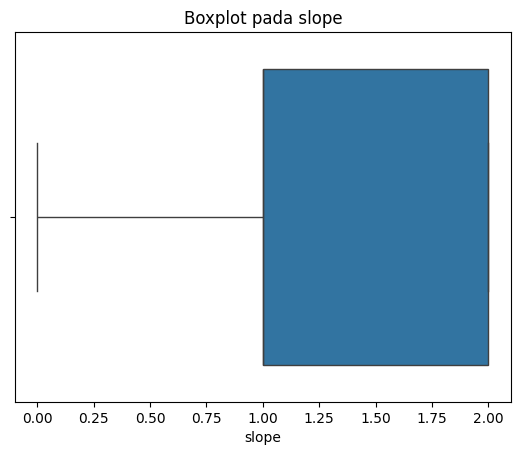

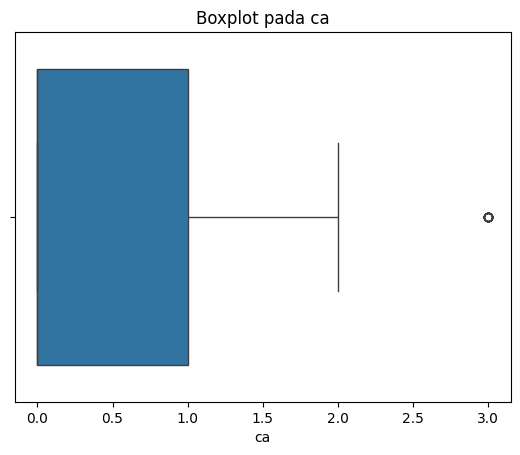

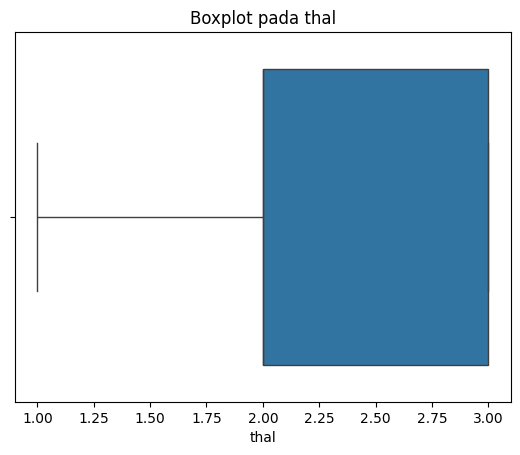

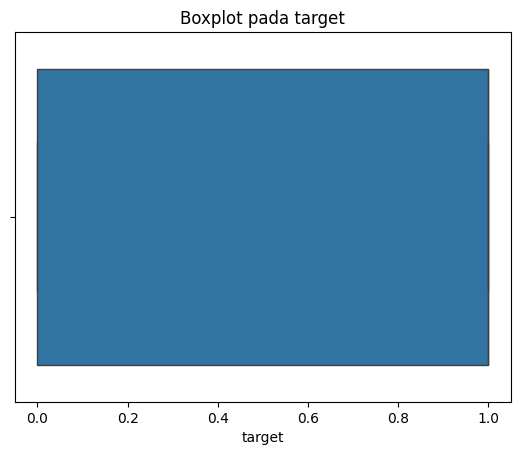

In [75]:
# Set ukuran gambar
plt.figure(figsize = (5, 3))

# Boxplot setelah penanganan outlier
for feature in numerical_features:
    sns.boxplot( x = df[feature], data = df)
    plt.title(f'Boxplot pada {feature}')
    plt.show()

Outlier pada kolom fbs tetap dibiarkan karena jika dihapus, maka nilai fbs = 1 akan hilang semua, sedangkan data tentang pasien yang memiliki kadar gula di atas 120 mg/dL (fbs = 1) masih dibutuhkan.

### **Memeriksa Imbalance Data pada Dataset**

In [76]:
df['target'].unique()

array([0, 1])

Diketahui bahwa pada kolom target terdapat hanya dua nilai, yaitu 0 dan 1 dengan keterangan:
0 = no disease
dan
1 = disease

In [77]:
df['target'].value_counts()

target
1    154
0    123
Name: count, dtype: int64

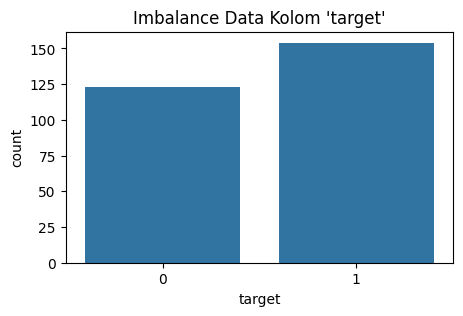

In [78]:
# Set ukuran gambar
plt.figure(figsize = (5, 3))

# Visualisasi Imbalance Data
sns.countplot(x = 'target', data = df)
plt.title('Imbalance Data Kolom \'target\'')
plt.show()

Dapat dilihat bahwa meskipun jumlahnya tidak sama, tetapi data cukup berimbang atau tidak terjadi imbalance data, sehingga tidak perlu diseimbangkan.

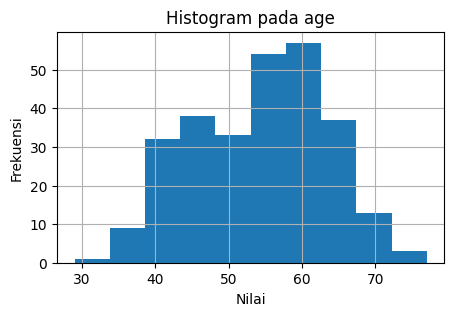

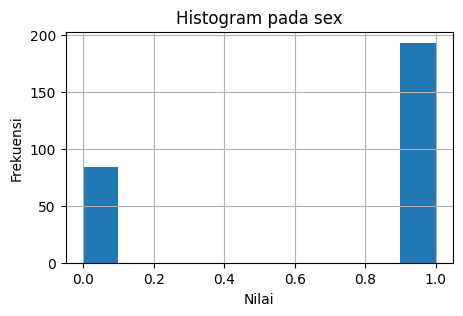

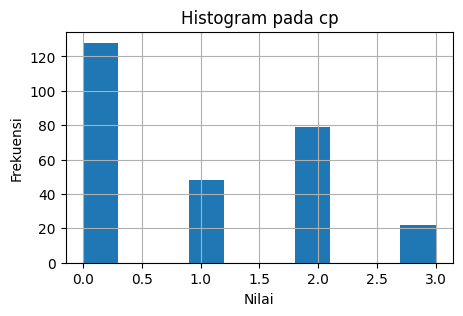

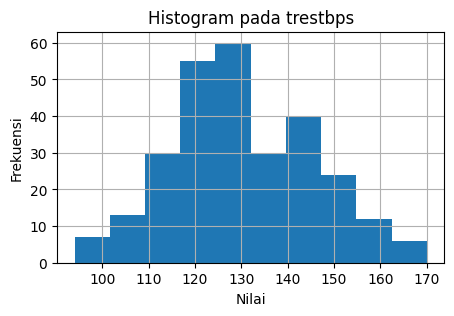

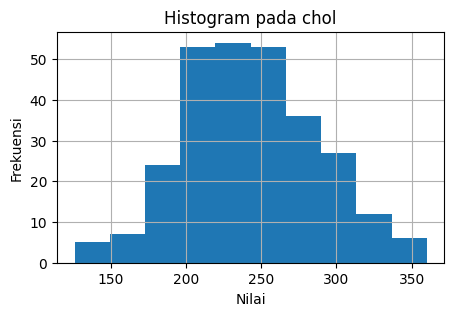

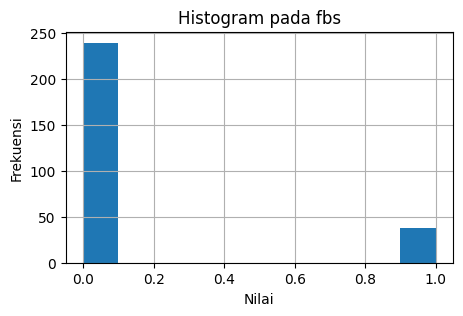

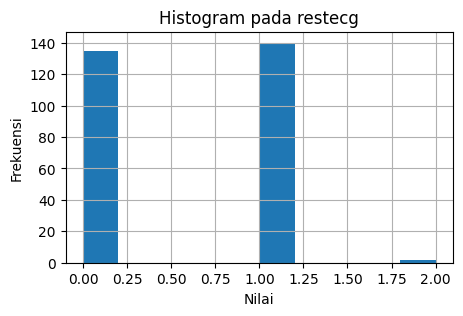

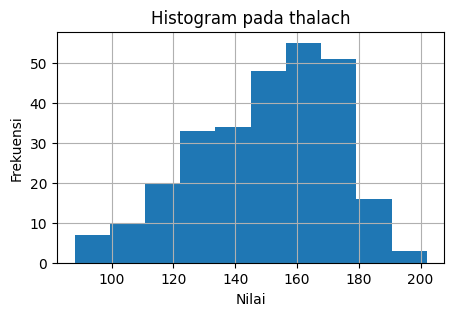

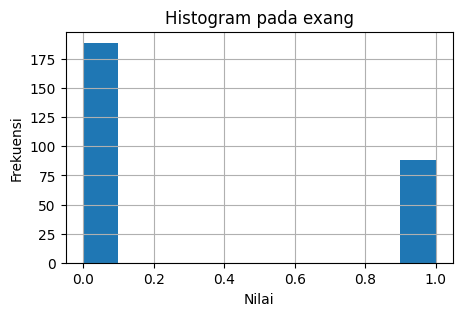

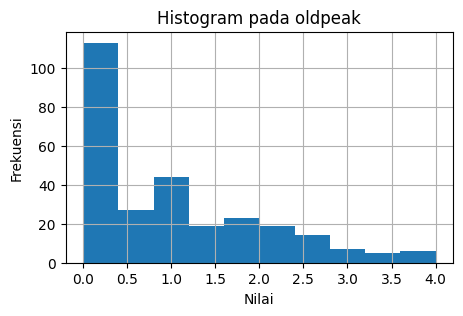

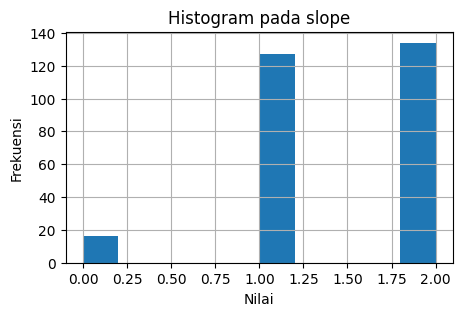

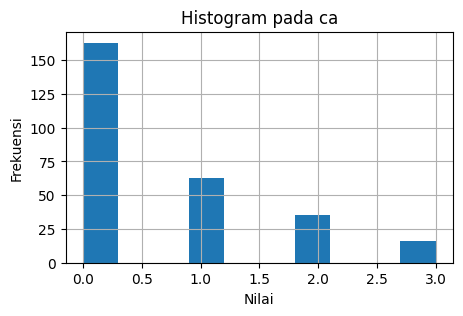

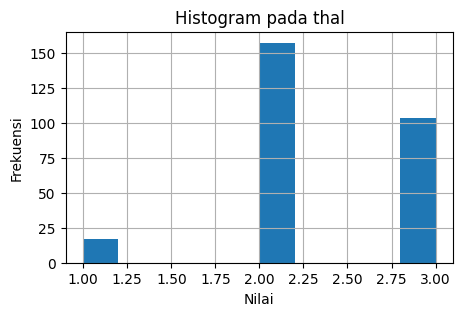

In [79]:
for feature in numerical_features:
    if feature == 'target':
        continue
    df[feature].hist(figsize = (5, 3), bins = 10)
    plt.title(f'Histogram pada {feature}')
    plt.xlabel('Nilai')
    plt.ylabel('Frekuensi')
    plt.show()

Selain kolom 'target', pada kolom lainnya terdapat imbalance data. Namun hal ini bisa diabaikan saja.

### **Feature Encoding**

In [80]:
# Memeriksa tipe data dari setiap kolom
data_types = df.dtypes

# Memeriksa kolom yang memiliki tipe data objek (string)
object_columns = data_types[data_types == 'object']

if len(object_columns) > 0:
    print("Terdapat kolom dengan tipe data objek.")
else:
    print("Semua kolom berupa data numerik.")

Semua kolom berupa data numerik.


Diketahui bahwa pada dataset karena kolom-kolomnya berupa data numerik.

## **Exploratory Data Analysis (EDA)**

### **Distinguish Attributes**

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 277 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       277 non-null    int64  
 1   sex       277 non-null    int64  
 2   cp        277 non-null    int64  
 3   trestbps  277 non-null    int64  
 4   chol      277 non-null    int64  
 5   fbs       277 non-null    int64  
 6   restecg   277 non-null    int64  
 7   thalach   277 non-null    int64  
 8   exang     277 non-null    int64  
 9   oldpeak   277 non-null    float64
 10  slope     277 non-null    int64  
 11  ca        277 non-null    int64  
 12  thal      277 non-null    int64  
 13  target    277 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.5 KB


age = age in years

sex = (1 = male; 0 = female)

cp = chest pain type

trestbps = resting blood pressure (in mm Hg on admission to the hospital)

chol = serum cholestoral in mg/dl

fbs = (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

restecg = resting electrocardiographic results

thalach = maximum heart rate achieved

exang = exercise induced angina (1 = yes; 0 = no)

oldpeak = ST depression induced by exercise relative to rest

slope = the slope of the peak exercise ST segment

ca = number of major vessels (0-3) colored by flourosopy

thal = (1 = normal; 2 = fixed defect; 3 = reversable defect)

target = (0 = no disease; 1 = disease)

Data-data sudah dalam bentuk data numerik, meskipun sebagian angka tersebut menggambarkan kategori atau kelas tertentu.

### **Mean, Median, Modus, dan Distribusi Data**

In [82]:
# Mean
df.mean()

age          54.151625
sex           0.696751
cp            0.981949
trestbps    129.848375
chol        242.924188
fbs           0.137184
restecg       0.519856
thalach     149.960289
exang         0.317690
oldpeak       0.967148
slope         1.425993
ca            0.653430
thal          2.310469
target        0.555957
dtype: float64

In [83]:
# Median
df.median()

age          55.0
sex           1.0
cp            1.0
trestbps    130.0
chol        240.0
fbs           0.0
restecg       1.0
thalach     153.0
exang         0.0
oldpeak       0.6
slope         1.0
ca            0.0
thal          2.0
target        1.0
dtype: float64

In [84]:
# Modus
df.mode()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,57,1.0,0.0,120,197,0.0,1.0,162.0,0.0,0.0,2.0,0.0,2.0,1.0
1,58,NaN,NaN,130,234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


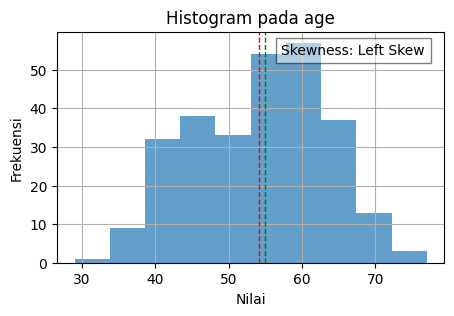

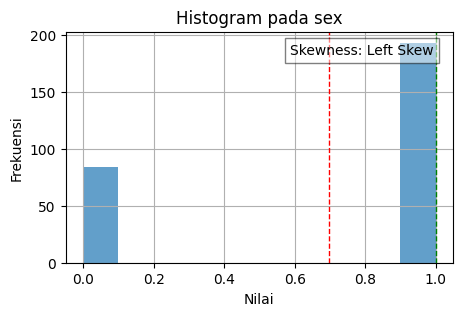

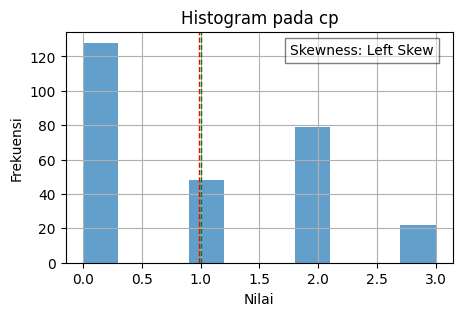

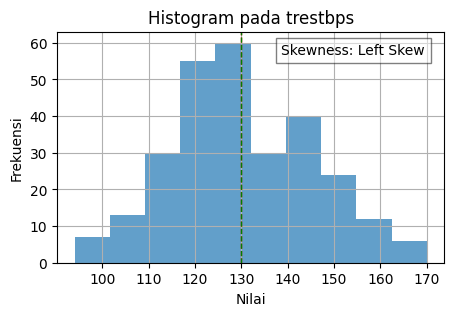

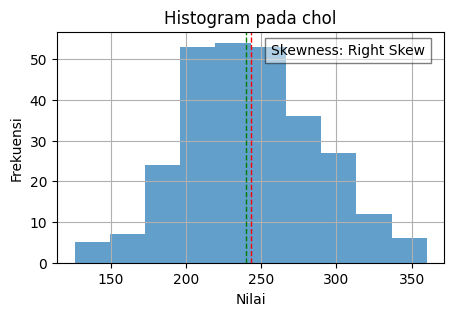

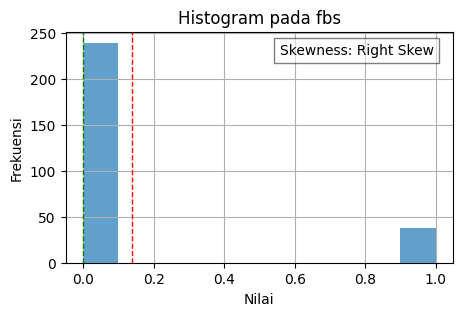

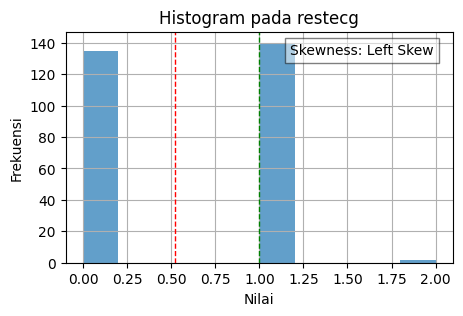

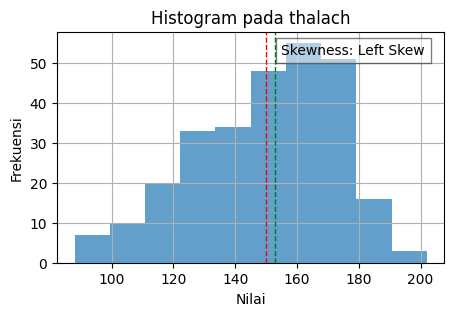

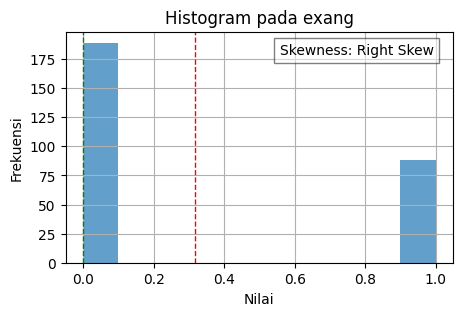

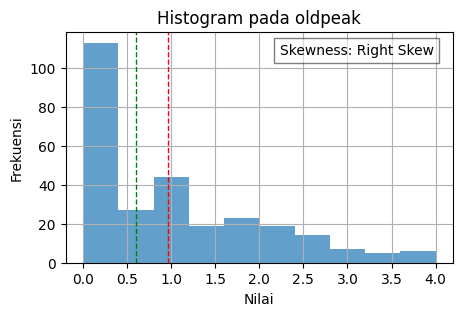

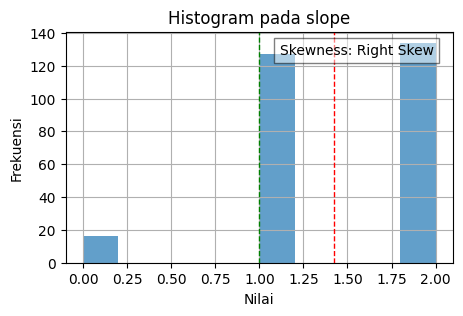

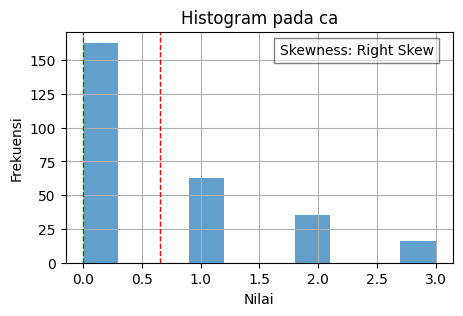

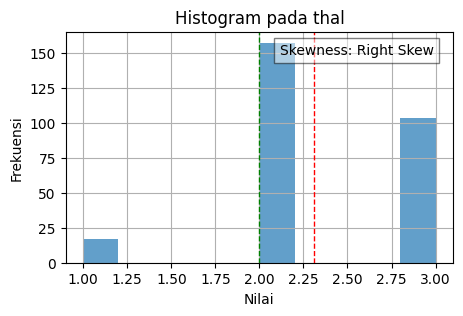

In [85]:
# Buat histogram dari masing-masing kolom untuk mengecek distribusi data
for feature in numerical_features:
    if feature == 'target':
        continue
    # Set ukuran gambar
    plt.figure(figsize = (5, 3))
    df[feature].hist(bins = 10, alpha = 0.7)
    # Tambahkan garis vertikal untuk mean
    plt.axvline(df[feature].mean(), color = 'red', linestyle = 'dashed', linewidth = 1)
    # Tambahkan garis vertikal untuk median
    plt.axvline(df[feature].median(), color = 'green', linestyle = 'dashed', linewidth = 1)
    plt.title(f'Histogram pada {feature}')
    plt.xlabel('Nilai')
    plt.ylabel('Frekuensi')

    # Tentukan skewness berdasarkan mean dan median
    if df[feature].mean() > df[feature].median():
        skewness = 'Right Skew'
    elif df[feature].mean() < df[feature].median():
        skewness = 'Left Skew'
    else:
        skewness = 'Symmetric'

    # Tambahkan teks skewness
    plt.text(0.95, 0.9, f'Skewness: {skewness}', transform=plt.gca().transAxes, ha = 'right', fontsize = 10, bbox = dict(facecolor = 'white', alpha = 0.5))

    plt.show()

Right skew (skewness positif) terjadi ketika ekor distribusi data panjang ke arah kanan, menunjukkan bahwa ada beberapa nilai yang jauh lebih besar dari sebagian besar nilai lainnya. Dalam distribusi right skew, *nilai mean akan cenderung lebih besar dari nilai median*, dan modus mungkin terletak di bagian kiri distribusi, di dekat nilai-nilai terendah. Sebaliknya, left skew (skewness negatif) terjadi ketika ekor distribusi data panjang ke arah kiri, menunjukkan adanya beberapa nilai yang jauh lebih kecil dari sebagian besar nilai lainnya. Dalam distribusi left skew, *nilai mean akan cenderung lebih kecil dari nilai median*, dan modus mungkin terletak di bagian kanan distribusi, di dekat nilai-nilai tertinggi. Di sisi lain, dalam distribusi yang simetris, tidak ada kecondongan yang jelas ke arah kanan atau kiri, sehingga ekor distribusi cenderung seimbang. Dalam hal ini, *nilai mean akan sama dengan nilai median*, dan modus akan berada di tengah distribusi, yang menunjukkan bahwa setiap sisi distribusi memiliki frekuensi yang sama.



1.   Mean Cocok digunakan ketika data memiliki distribusi simetris atau hampir simetris, karena rata-rata akan mencerminkan pusat massa data. Mean rentan terhadap pengaruh outlier, sehingga tidak cocok digunakan jika data memiliki outlier atau distribusi yang tidak simetris.
2.  Median lebih tahan terhadap outlier daripada mean, sehingga lebih cocok digunakan ketika data memiliki outlier atau distribusi yang tidak simetris. Median cocok digunakan untuk data yang tidak memiliki distribusi simetris, seperti data yang condong ke kiri (left-skewed) atau ke kanan (right-skewed).
3. Modus cocok digunakan untuk data kategorikal atau data berbentuk distribusi yang memiliki puncak yang jelas (bimodal atau multimodal).



### **Statistical Five Summaries**

In [86]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,277.0,54.151625,9.146479,29.0,47.0,55.0,61.0,77.0
sex,277.0,0.696751,0.460494,0.0,0.0,1.0,1.0,1.0
cp,277.0,0.981949,1.033689,0.0,0.0,1.0,2.0,3.0
trestbps,277.0,129.848375,15.534631,94.0,120.0,130.0,140.0,170.0
chol,277.0,242.924188,44.827342,126.0,211.0,240.0,271.0,360.0
fbs,277.0,0.137184,0.344664,0.0,0.0,0.0,0.0,1.0
restecg,277.0,0.519856,0.514784,0.0,0.0,1.0,1.0,2.0
thalach,277.0,149.960289,22.759658,88.0,133.0,153.0,168.0,202.0
exang,277.0,0.317690,0.466421,0.0,0.0,0.0,1.0,1.0
oldpeak,277.0,0.967148,1.030813,0.0,0.0,0.6,1.6,4.0


Dapat dilihat hasil statistical five summaries dari setiap kolom pada dataset.

# **Machine Learning Model**

Klasifikasi merupakan model machine learning yang dapat digunakan untuk heart disease dataset.

Ini dikarenakan klasifikasi merupakan salah satu model machine learning yang sangat relevan dan sering digunakan dalam berbagai konteks analisis data. Model klasifikasi memungkinkan kita untuk memprediksi kategori atau label dari suatu data berdasarkan fitur-fiturnya. Keunggulan utama klasifikasi adalah kemampuannya untuk menyelesaikan masalah yang umum dijumpai dalam dunia nyata, seperti pengenalan gambar, deteksi spam email, atau identifikasi penyakit. Selain itu, hasil dari model klasifikasi cenderung mudah diinterpretasikan, sehingga memberikan pemahaman yang jelas tentang output yang dihasilkan. Kita juga dapat menggunakan berbagai metrik evaluasi untuk mengukur kinerja model klasifikasi, seperti akurasi, presisi, recall, dan F1-score, yang memungkinkan kita untuk mengevaluasi seberapa baik model tersebut dalam memprediksi kelas-kelas yang berbeda. Kemudian, ada fleksibilitas dalam memilih algoritma klasifikasi yang paling sesuai dengan data dan kebutuhan analisis, dari yang sederhana hingga yang sangat kompleks. Selain itu, klasifikasi dapat menangani data yang berukuran besar dengan baik, sehingga cocok untuk berbagai aplikasi di berbagai domain, seperti kedokteran, keuangan, dan teknologi. Dengan kemampuannya untuk memahami pola-pola dalam data, model klasifikasi juga dapat membantu dalam pengambilan keputusan yang lebih baik dalam berbagai konteks, dari pengelolaan risiko hingga pengembangan produk. Oleh karena itu, klasifikasi merupakan model machine learning yang sangat relevan, serbaguna, dan berguna dalam analisis data.

### **Pembagian Data Training dan Data Test**

In [87]:
# Inisialisasi list untuk fitur kategorikal dan kontinu
categorical_features = []
continuous_features = []

# Identifikasi fitur kategorikal dan kontinu
for column in df.columns:
    # Hitung jumlah nilai unik dalam kolom
    unique_value_counts = len(df[column].unique())
    # Jika jumlah nilai unik kurang dari atau sama dengan 10, maka kolom dianggap fitur kategorikal
    if unique_value_counts <= 10:
        categorical_features.append(column)
    # Jika jumlah nilai unik lebih dari 10, maka kolom dianggap fitur kontinu
    else:
        continuous_features.append(column)

# Hapus kolom 'target' dari list fitur kategorikal
categorical_features.remove('target')

# Encoding one-hot untuk fitur kategorikal
df = pd.get_dummies(data = df, columns=categorical_features)

# Penskalaan fitur kontinu menggunakan StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[continuous_features] = scaler.fit_transform(df[continuous_features])

In [88]:
# Pembagian data train dan test
X = df.drop('target', axis = 1)  # Fitur-fitur
y = df['target']  # Target

# Pembagian data train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## **Klasifikasi dengan Logistic Regression**

### **Base Model**

In [89]:
# Impor library yang diperlukan
from sklearn.linear_model import LogisticRegression

In [90]:
# Inisialisasi model Logistic Regression
logistic_regression_model = LogisticRegression()

# Melatih model menggunakan data train
logistic_regression_model.fit(X_train, y_train)

# Melakukan prediksi menggunakan data test
y_pred = logistic_regression_model.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model:", accuracy)

# Menampilkan laporan klasifikasi
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Menampilkan confusion matrix
print("\nConfusion Matrix:")
print(cm)

Akurasi model: 0.8035714285714286

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.68      0.79      0.73        19
           1       0.88      0.81      0.85        37

    accuracy                           0.80        56
   macro avg       0.78      0.80      0.79        56
weighted avg       0.81      0.80      0.81        56


Confusion Matrix:
[[15  4]
 [ 7 30]]


Model evaluasi memiliki akurasi sebesar 80.36%, yang menunjukkan bahwa sekitar 80.36% dari total prediksi yang dilakukan oleh model adalah benar. Precision, yang mengukur keakuratan prediksi positif oleh model, menunjukkan bahwa sekitar 68% dari prediksi yang diklasifikasikan sebagai kelas 0 adalah benar, sedangkan sekitar 88% dari prediksi kelas 1 adalah benar. Recall, yang mengukur kemampuan model dalam mengidentifikasi semua instance yang benar dari kelas tertentu, menunjukkan bahwa sekitar 79% dari semua kasus kelas 0 yang sebenarnya dan sekitar 81% dari semua kasus kelas 1 yang sebenarnya dapat diidentifikasi dengan benar oleh model. F1-score, yang menggabungkan precision dan recall, memiliki nilai sebesar 0.73 untuk kelas 0 dan 0.85 untuk kelas 1, menunjukkan keseimbangan yang baik antara precision dan recall untuk kedua kelas. Confusion matrix menyajikan distribusi prediksi yang benar dan salah untuk kedua kelas, dengan jumlah True Negative (TN) sebesar 15, False Positive (FP) sebesar 4, False Negative (FN) sebesar 7, dan True Positive (TP) sebesar 30. Dengan demikian, evaluasi model memberikan gambaran komprehensif tentang kinerja model dalam memprediksi kelas target, dengan akurasi yang tinggi dan keseimbangan yang baik antara precision dan recall.

### **Learning Curve**

In [91]:
# Fungsi untuk membuat learning curves dengan tipe akurasi
def plot_learning_curve(estimator, title, X, y, ylim = None, cv = None, n_jobs = None, train_sizes = np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training Examples")
    plt.ylabel("Accuracy")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv = cv, n_jobs = n_jobs, train_sizes = train_sizes, scoring = 'accuracy')
    train_scores_mean = np.mean(train_scores, axis = 1)
    train_scores_std = np.std(train_scores, axis = 1)
    test_scores_mean = np.mean(test_scores, axis = 1)
    test_scores_std = np.std(test_scores, axis = 1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha = 0.1,
                     color = "r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha = 0.1, color = "g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color = "r",
             label = "Training Accuracy")
    plt.plot(train_sizes, test_scores_mean, 'o-', color = "g",
             label = "Cross-validation Accuracy")

    plt.legend(loc = "best")
    return plt

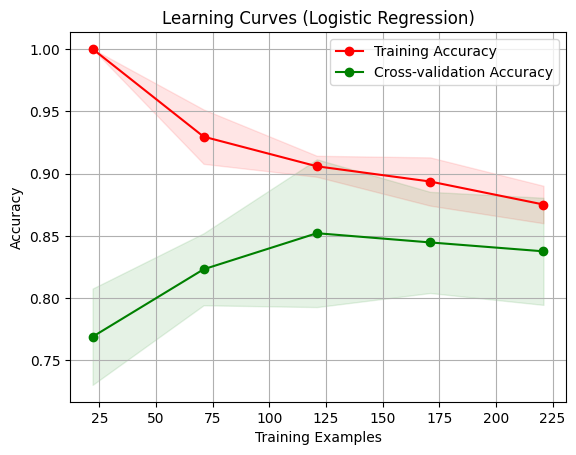

In [92]:
title = "Learning Curves (Logistic Regression)"
cv = StratifiedKFold(n_splits = 5)  # Jumlah lipatan dalam cross-validation

# Plot learning curves
plot_learning_curve(logistic_regression_model, title, X, y, cv = cv, n_jobs = -1)

plt.show()

### **Model Improvement dengan Bootstrapping**

In [93]:
# Inisialisasi Bagging Classifier dengan Logistic Regression sebagai base estimator
bagging_logistic_regression_model = BaggingClassifier(base_estimator = logistic_regression_model, n_estimators = 10, random_state=42)

# Melatih model dengan data train
bagging_logistic_regression_model.fit(X_train, y_train)

# Melakukan prediksi menggunakan model ensemble
y_pred = bagging_logistic_regression_model.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model setelah bootstrapping:", accuracy)

# Menampilkan laporan klasifikasi
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Menampilkan confusion matrix
print("\nConfusion Matrix:")
print(cm)

Akurasi model setelah bootstrapping: 0.8392857142857143

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.75      0.79      0.77        19
           1       0.89      0.86      0.88        37

    accuracy                           0.84        56
   macro avg       0.82      0.83      0.82        56
weighted avg       0.84      0.84      0.84        56


Confusion Matrix:
[[15  4]
 [ 5 32]]


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Hasil evaluasi model setelah proses bootstrapping menunjukkan peningkatan kinerja dengan akurasi sebesar 83.93%. Laporan klasifikasi memberikan gambaran lebih rinci tentang performa model dengan metrik precision, recall, dan f1-score untuk setiap kelas. Untuk kelas 0, precision sebesar 0.75 dan recall sebesar 0.79, yang mengindikasikan bahwa sekitar 75% dari prediksi yang diklasifikasikan sebagai kelas 0 adalah benar, dan sekitar 79% dari semua instance kelas 0 dapat diidentifikasi dengan benar oleh model. Sementara itu, untuk kelas 1, precision mencapai 0.89 dan recall sebesar 0.86, yang menunjukkan kemampuan model dalam mengklasifikasikan sekitar 89% dari prediksi sebagai kelas 1 yang benar, dan sekitar 86% dari semua instance kelas 1 dapat diidentifikasi dengan benar. F1-score, yang mengukur rata-rata harmonis antara precision dan recall, juga menunjukkan peningkatan keseimbangan antara kedua metrik tersebut untuk kedua kelas. Confusion matrix memberikan wawasan tambahan tentang performa model dengan menampilkan jumlah prediksi yang benar dan salah untuk setiap kelas. Dalam kasus ini, terdapat 15 True Negative (TN), 4 False Positive (FP), 5 False Negative (FN), dan 32 True Positive (TP). Dengan demikian, hasil evaluasi model setelah bootstrapping menunjukkan peningkatan yang signifikan dalam kemampuan model dalam memprediksi kelas target dengan akurasi yang lebih tinggi dan keseimbangan yang lebih baik antara precision dan recall untuk kedua kelas.

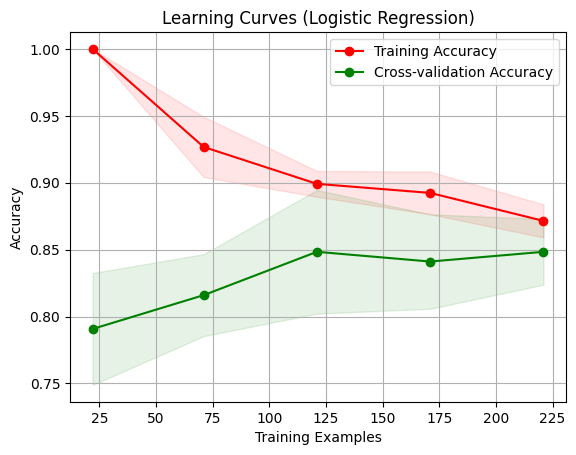

In [94]:
title = "Learning Curves (Logistic Regression)"
cv = StratifiedKFold(n_splits = 5)  # Jumlah lipatan dalam cross-validation

# Plot learning curves
plot_learning_curve(bagging_logistic_regression_model, title, X, y, cv = cv, n_jobs = -1)

plt.show()

## **Klasifikasi dengan Decision Tree**

### **Base Model**

In [95]:
# Impor library yang diperlukan
from sklearn.tree import DecisionTreeClassifier

In [96]:
# Inisialisasi model Decision Tree
decision_tree_model = DecisionTreeClassifier()

# Melatih model menggunakan data train
decision_tree_model.fit(X_train, y_train)

# Melakukan prediksi menggunakan data test
y_pred = decision_tree_model.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model:", accuracy)

# Menampilkan laporan klasifikasi
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Menampilkan confusion matrix
print("\nConfusion Matrix:")
print(cm)

Akurasi model: 0.6785714285714286

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.52      0.79      0.62        19
           1       0.85      0.62      0.72        37

    accuracy                           0.68        56
   macro avg       0.68      0.71      0.67        56
weighted avg       0.74      0.68      0.69        56


Confusion Matrix:
[[15  4]
 [14 23]]


Hasil evaluasi model Decision Tree menunjukkan kinerja yang cukup baik, meskipun dengan akurasi yang sedikit rendah sebesar 67.86%. Meskipun demikian, laporan klasifikasi memberikan gambaran yang lebih rinci tentang performa model dalam memprediksi kelas target. Precision dan recall untuk kedua kelas (0 dan 1) menunjukkan ketidakseimbangan yang sedikit. Untuk kelas 0, precision sebesar 0.52 dan recall sebesar 0.79, yang menunjukkan bahwa sekitar 52% dari prediksi yang diklasifikasikan sebagai kelas 0 adalah benar, dan sekitar 79% dari semua instance kelas 0 dapat diidentifikasi dengan benar oleh model. Di sisi lain, untuk kelas 1, precision mencapai 0.85 dan recall sebesar 0.62, yang menunjukkan bahwa sekitar 85% dari prediksi sebagai kelas 1 yang benar, dan sekitar 62% dari semua instance kelas 1 dapat diidentifikasi dengan benar oleh model. Meskipun f1-score menunjukkan peningkatan yang sedikit dibandingkan dengan akurasi, namun keberadaan imbalance precision dan recall, serta tingginya jumlah False Negative (FN) dalam confusion matrix menunjukkan bahwa model mungkin belum optimal dalam mengklasifikasikan kelas 0 dengan baik. Oleh karena itu, evaluasi menyiratkan bahwa model Decision Tree mungkin perlu disempurnakan lebih lanjut untuk meningkatkan kinerjanya dalam memprediksi kelas target.

### **Learning Curve**

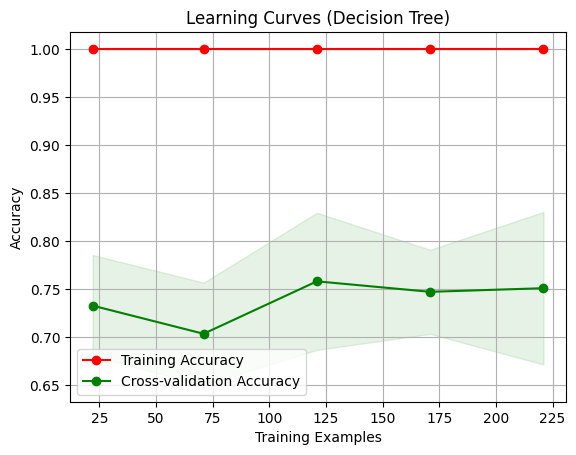

In [97]:
title = "Learning Curves (Decision Tree)"

# Plot learning curves
plot_learning_curve(decision_tree_model, title, X, y, cv = cv, n_jobs = -1)

plt.show()

### **Model Improvement dengan Bootstrapping**

In [98]:
# Inisialisasi Bagging Classifier dengan model Decision Tree
bagging_decision_tree_model = BaggingClassifier(base_estimator = decision_tree_model, n_estimators = 100, random_state = 42)

# Melatih model dengan data train
bagging_decision_tree_model.fit(X_train, y_train)

# Melakukan prediksi menggunakan model
y_pred = bagging_decision_tree_model.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model setelah bootstrapping:", accuracy)

# Menampilkan laporan klasifikasi
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Menampilkan confusion matrix
print("\nConfusion Matrix:")
print(cm)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Akurasi model setelah bootstrapping: 0.7857142857142857

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.64      0.84      0.73        19
           1       0.90      0.76      0.82        37

    accuracy                           0.79        56
   macro avg       0.77      0.80      0.78        56
weighted avg       0.81      0.79      0.79        56


Confusion Matrix:
[[16  3]
 [ 9 28]]


Hasil evaluasi model setelah proses bootstrapping menunjukkan peningkatan kinerja dengan akurasi mencapai 78.57%. Laporan klasifikasi memberikan insight lebih lanjut tentang performa model dalam memprediksi kelas target. Precision dan recall untuk kedua kelas (0 dan 1) menunjukkan keseimbangan yang baik. Untuk kelas 0, precision sebesar 0.64 dan recall sebesar 0.84, yang mengindikasikan bahwa sekitar 64% dari prediksi yang diklasifikasikan sebagai kelas 0 adalah benar, dan sekitar 84% dari semua instance kelas 0 dapat diidentifikasi dengan benar oleh model. Di sisi lain, untuk kelas 1, precision mencapai 0.90 dan recall sebesar 0.76, yang menunjukkan kemampuan model dalam mengklasifikasikan sekitar 90% dari prediksi sebagai kelas 1 yang benar, dan sekitar 76% dari semua instance kelas 1 dapat diidentifikasi dengan benar oleh model. F1-score, yang mengukur rata-rata harmonis antara precision dan recall, juga menunjukkan peningkatan keseimbangan antara kedua metrik tersebut untuk kedua kelas. Meskipun demikian, masih terdapat peningkatan yang dapat dilakukan terutama dalam mengurangi jumlah False Negative (FN) untuk kelas 1. Dengan demikian, hasil evaluasi model setelah bootstrapping menunjukkan peningkatan yang signifikan dalam kemampuan model dalam memprediksi kelas target dengan akurasi yang lebih tinggi dan keseimbangan yang lebih baik antara precision dan recall untuk kedua kelas.

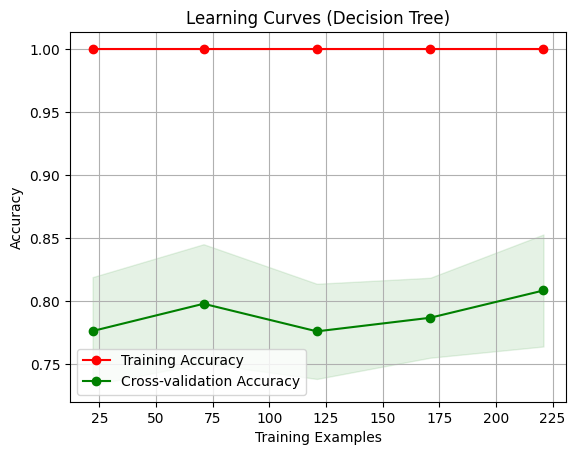

In [99]:
title = "Learning Curves (Decision Tree)"

# Plot learning curves
plot_learning_curve(bagging_decision_tree_model, title, X, y, cv = cv, n_jobs = -1)

plt.show()

## **Klasifikasi dengan Random Forest**

### **Base Model**

In [100]:
# Impor library yang diperlukan
from sklearn.ensemble import RandomForestClassifier

In [101]:
# Inisialisasi model Random Forest
random_forest_model = RandomForestClassifier()

# Melatih model menggunakan data train
random_forest_model.fit(X_train, y_train)

# Melakukan prediksi menggunakan data test
y_pred = random_forest_model.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model:", accuracy)

# Menampilkan laporan klasifikasi
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Menampilkan confusion matrix
print("\nConfusion Matrix:")
print(cm)

Akurasi model: 0.7678571428571429

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.62      0.84      0.71        19
           1       0.90      0.73      0.81        37

    accuracy                           0.77        56
   macro avg       0.76      0.79      0.76        56
weighted avg       0.80      0.77      0.77        56


Confusion Matrix:
[[16  3]
 [10 27]]


Hasil dari model Random Forest menunjukkan akurasi sebesar 76.79%. Dalam laporan klasifikasi, terlihat bahwa precision untuk kelas 0 adalah 0.62, yang berarti dari semua prediksi yang diklasifikasikan sebagai kelas 0 oleh model, sekitar 62% prediksi tersebut benar. Sementara itu, precision untuk kelas 1 adalah 0.90, yang menunjukkan bahwa sekitar 90% dari prediksi yang diklasifikasikan sebagai kelas 1 oleh model adalah benar. Recall untuk kelas 0 adalah 0.84, yang berarti model mampu mengidentifikasi sekitar 84% dari keseluruhan kasus yang sebenarnya kelas 0. Sedangkan recall untuk kelas 1 adalah 0.73, menunjukkan bahwa model hanya mampu mengidentifikasi sekitar 73% dari keseluruhan kasus yang sebenarnya kelas 1. F1-score, yang merupakan rata-rata harmonis dari precision dan recall, untuk kelas 0 adalah 0.71, dan untuk kelas 1 adalah 0.81. Ini menunjukkan bahwa model memiliki keseimbangan yang cukup baik antara precision dan recall untuk kelas 1, sementara untuk kelas 0, keseimbangannya sedikit lebih rendah. Dari confusion matrix, dapat dilihat bahwa terdapat 16 True Negative (TN), 3 False Positive (FP), 10 False Negative (FN), dan 27 True Positive (TP). Dari sini terlihat bahwa model cenderung memiliki performa yang lebih baik dalam mengidentifikasi kelas 0 (True Negative yang tinggi), namun sedikit lebih rendah dalam mengidentifikasi kelas 1 (True Positive yang lebih rendah).

### **Learning Curve**

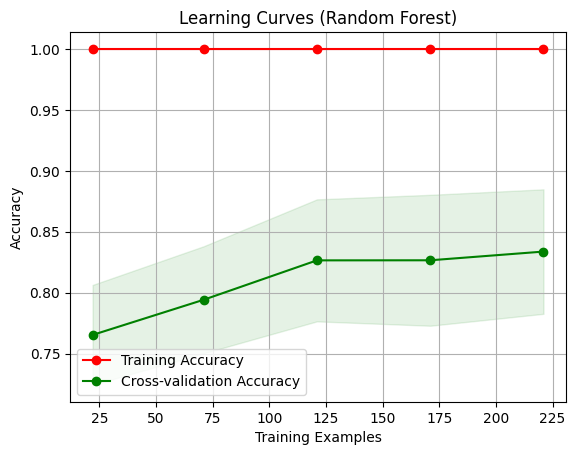

In [102]:
title = "Learning Curves (Random Forest)"

# Plot learning curves
plot_learning_curve(random_forest_model, title, X, y, cv = cv, n_jobs = -1)

plt.show()

### **Model Improvement dengan Bootstrapping**

In [103]:
# Inisialisasi Bagging Classifier dengan model Random Forest
bagging_random_forest_model = BaggingClassifier(base_estimator = random_forest_model, n_estimators = 100, random_state = 42)

# Melatih model dengan data train
bagging_random_forest_model.fit(X_train, y_train)

# Melakukan prediksi menggunakan model
y_pred = bagging_random_forest_model.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model setelah bootstrapping:", accuracy)

# Menampilkan laporan klasifikasi
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Menampilkan confusion matrix
print("\nConfusion Matrix:")
print(cm)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Akurasi model setelah bootstrapping: 0.8214285714285714

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.70      0.84      0.76        19
           1       0.91      0.81      0.86        37

    accuracy                           0.82        56
   macro avg       0.80      0.83      0.81        56
weighted avg       0.84      0.82      0.82        56


Confusion Matrix:
[[16  3]
 [ 7 30]]


Hasil evaluasi model setelah proses bootstrapping menunjukkan peningkatan kinerja dengan akurasi mencapai 82.14%. Laporan klasifikasi memberikan insight lebih lanjut tentang performa model dalam memprediksi kelas target. Precision dan recall untuk kedua kelas (0 dan 1) menunjukkan keseimbangan yang baik. Untuk kelas 0, precision sebesar 0.70 dan recall sebesar 0.84, yang mengindikasikan bahwa sekitar 70% dari prediksi yang diklasifikasikan sebagai kelas 0 adalah benar, dan sekitar 84% dari semua instance kelas 0 dapat diidentifikasi dengan benar oleh model. Di sisi lain, untuk kelas 1, precision mencapai 0.91 dan recall sebesar 0.81, yang menunjukkan kemampuan model dalam mengklasifikasikan sekitar 91% dari prediksi sebagai kelas 1 yang benar, dan sekitar 81% dari semua instance kelas 1 dapat diidentifikasi dengan benar oleh model. F1-score, yang mengukur rata-rata harmonis antara precision dan recall, juga menunjukkan keseimbangan yang baik antara kedua metrik tersebut untuk kedua kelas. Meskipun demikian, terdapat ruang untuk peningkatan, terutama dalam mengurangi jumlah False Negative (FN) untuk kelas 1. Confusion matrix juga memberikan gambaran tentang distribusi prediksi yang benar dan salah untuk kedua kelas, dengan jumlah True Negative (TN) sebesar 16, False Positive (FP) sebesar 3, False Negative (FN) sebesar 7, dan True Positive (TP) sebesar 30. Dengan demikian, hasil evaluasi model setelah bootstrapping menunjukkan peningkatan yang signifikan dalam kemampuan model dalam memprediksi kelas target dengan akurasi yang lebih tinggi dan keseimbangan yang lebih baik antara precision dan recall untuk kedua kelas.

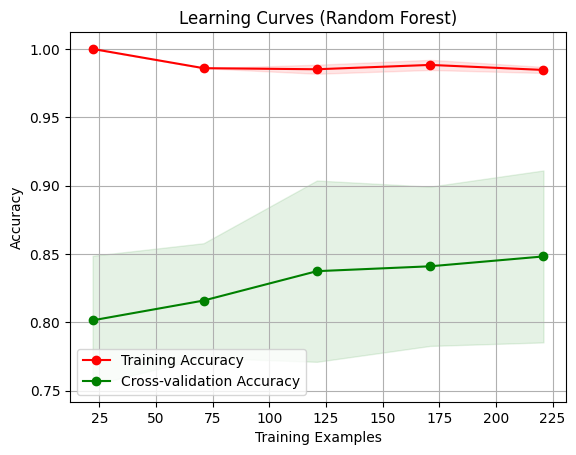

In [104]:
title = "Learning Curves (Random Forest)"

# Plot learning curves
plot_learning_curve(bagging_random_forest_model, title, X, y, cv = cv, n_jobs = -1)

plt.show()

## **Klasifikasi dengan Support Vector Machines (SVM)**

### **Base Model**

In [105]:
# Impor library yang diperlukan
from sklearn.svm import SVC

In [106]:
# Inisialisasi model SVM
svm_model = SVC()

# Melatih model menggunakan data train
svm_model.fit(X_train, y_train)

# Melakukan prediksi menggunakan data test
y_pred = svm_model.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model:", accuracy)

# Menampilkan laporan klasifikasi
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Menampilkan confusion matrix
print("\nConfusion Matrix:")
print(cm)

Akurasi model: 0.8214285714285714

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.70      0.84      0.76        19
           1       0.91      0.81      0.86        37

    accuracy                           0.82        56
   macro avg       0.80      0.83      0.81        56
weighted avg       0.84      0.82      0.82        56


Confusion Matrix:
[[16  3]
 [ 7 30]]


Hasil evaluasi model Support Vector Machines (SVM) menunjukkan kinerja yang cukup baik dengan akurasi sebesar 82.14%. Laporan klasifikasi memberikan informasi lebih rinci tentang kemampuan model dalam memprediksi kelas target. Precision dan recall untuk kedua kelas (0 dan 1) menunjukkan keseimbangan yang baik. Untuk kelas 0, precision sebesar 0.70 dan recall sebesar 0.84, yang mengindikasikan bahwa sekitar 70% dari prediksi yang diklasifikasikan sebagai kelas 0 adalah benar, dan sekitar 84% dari semua instance kelas 0 dapat diidentifikasi dengan benar oleh model. Di sisi lain, untuk kelas 1, precision mencapai 0.91 dan recall sebesar 0.81, menunjukkan bahwa sekitar 91% dari prediksi yang diklasifikasikan sebagai kelas 1 adalah benar, dan sekitar 81% dari semua instance kelas 1 dapat diidentifikasi dengan benar oleh model. F1-score, yang mengukur rata-rata harmonis antara precision dan recall, juga menunjukkan keseimbangan yang baik antara kedua metrik tersebut untuk kedua kelas. Meskipun demikian, terdapat ruang untuk peningkatan, terutama dalam mengurangi jumlah False Negative (FN) untuk kelas 1. Confusion matrix memberikan gambaran yang lebih terperinci tentang distribusi prediksi yang benar dan salah untuk kedua kelas, dengan jumlah True Negative (TN) sebesar 16, False Positive (FP) sebesar 3, False Negative (FN) sebesar 7, dan True Positive (TP) sebesar 30. Secara keseluruhan, hasil evaluasi model SVM menunjukkan kinerja yang solid dalam memprediksi kelas target dengan akurasi yang tinggi dan keseimbangan yang baik antara precision dan recall untuk kedua kelas.

### **Learning Curve**

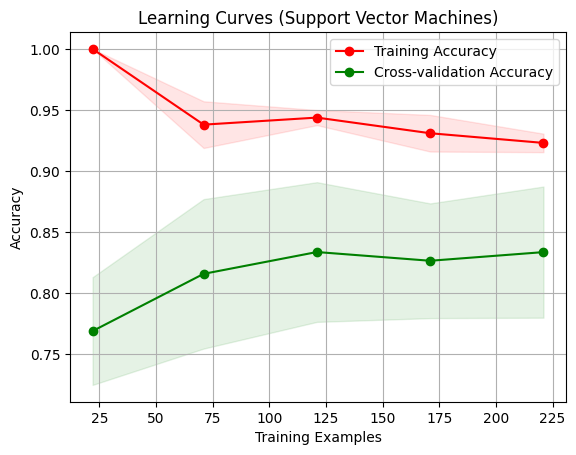

In [107]:
title = "Learning Curves (Support Vector Machines)"

# Plot learning curves
plot_learning_curve(svm_model, title, X, y, cv = cv, n_jobs = -1)

plt.show()

### **Model Improvement dengan Bootstrapping**

In [108]:
# Inisialisasi Bagging Classifier dengan model Random Forest
bagging_svm_model = BaggingClassifier(base_estimator = svm_model, n_estimators = 100, random_state = 42)

# Melatih model dengan data train
bagging_svm_model.fit(X_train, y_train)

# Melakukan prediksi menggunakan model
y_pred = bagging_svm_model.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model setelah bootstrapping:", accuracy)

# Menampilkan laporan klasifikasi
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Menampilkan confusion matrix
print("\nConfusion Matrix:")
print(cm)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Akurasi model setelah bootstrapping: 0.8214285714285714

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.70      0.84      0.76        19
           1       0.91      0.81      0.86        37

    accuracy                           0.82        56
   macro avg       0.80      0.83      0.81        56
weighted avg       0.84      0.82      0.82        56


Confusion Matrix:
[[16  3]
 [ 7 30]]


Hasil evaluasi model setelah diterapkan bootstrapping sama dengan hasil base modelnya.

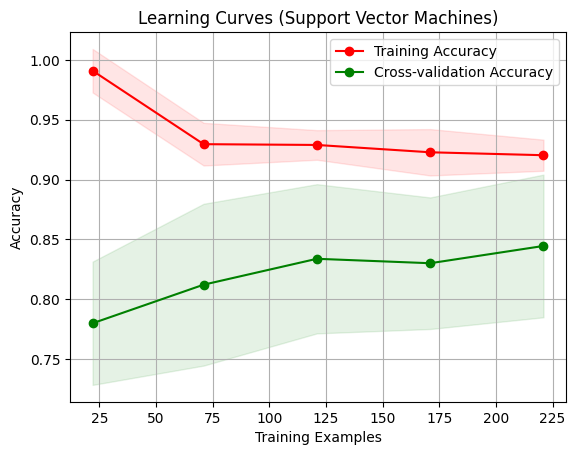

In [109]:
title = "Learning Curves (Support Vector Machines)"

# Plot learning curves
plot_learning_curve(bagging_svm_model, title, X, y, cv = cv, n_jobs = -1)

plt.show()

## **Klasifikasi dengan K-Nearest Neighbors (KNN)**

### **Base Model**

In [110]:
# Impor library yang diperlukan
from sklearn.neighbors import KNeighborsClassifier

In [111]:
# Inisialisasi model K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors = 5)

# Melatih model menggunakan data train
knn_model.fit(X_train, y_train)

# Melakukan prediksi menggunakan data test
y_pred = knn_model.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model:", accuracy)

# Menampilkan laporan klasifikasi
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Menampilkan confusion matrix
print("\nConfusion Matrix:")
print(cm)

Akurasi model: 0.8214285714285714

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.71      0.79      0.75        19
           1       0.89      0.84      0.86        37

    accuracy                           0.82        56
   macro avg       0.80      0.81      0.81        56
weighted avg       0.83      0.82      0.82        56


Confusion Matrix:
[[15  4]
 [ 6 31]]


Hasil evaluasi model K-Nearest Neighbors (KNN) menunjukkan kinerja yang baik dengan akurasi mencapai 82.14%. Laporan klasifikasi memberikan gambaran lebih rinci tentang kemampuan model dalam memprediksi kelas target. Precision dan recall untuk kedua kelas (0 dan 1) menunjukkan keseimbangan yang baik. Untuk kelas 0, precision sebesar 0.71 dan recall sebesar 0.79, yang berarti sekitar 71% dari prediksi yang diklasifikasikan sebagai kelas 0 adalah benar, dan sekitar 79% dari semua instance kelas 0 dapat diidentifikasi dengan benar oleh model. Di sisi lain, untuk kelas 1, precision mencapai 0.89 dan recall sebesar 0.84, menunjukkan bahwa sekitar 89% dari prediksi yang diklasifikasikan sebagai kelas 1 adalah benar, dan sekitar 84% dari semua instance kelas 1 dapat diidentifikasi dengan benar oleh model. F1-score, yang mengukur rata-rata harmonis antara precision dan recall, juga menunjukkan keseimbangan yang baik antara kedua metrik tersebut untuk kedua kelas. Confusion matrix memberikan gambaran yang lebih terperinci tentang distribusi prediksi yang benar dan salah untuk kedua kelas, dengan jumlah True Negative (TN) sebesar 15, False Positive (FP) sebesar 4, False Negative (FN) sebesar 6, dan True Positive (TP) sebesar 31. Secara keseluruhan, hasil evaluasi model KNN menunjukkan kinerja yang solid dalam memprediksi kelas target dengan akurasi yang tinggi dan keseimbangan yang baik antara precision dan recall untuk kedua kelas.

### **Learning Curve**

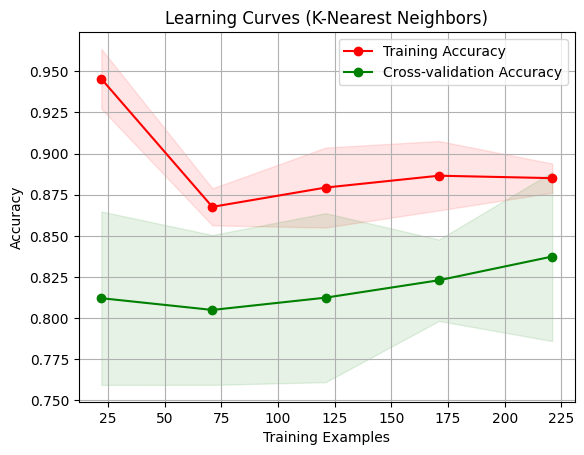

In [112]:
title = "Learning Curves (K-Nearest Neighbors)"

# Plot learning curves
plot_learning_curve(knn_model, title, X, y, cv = cv, n_jobs = -1)

plt.show()

### **Model Improvement dengan Bootstrapping**

In [113]:
# Inisialisasi Bagging Classifier dengan model Random Forest
bagging_knn_model = BaggingClassifier(base_estimator = knn_model, n_estimators = 100, random_state = 42)

# Melatih model dengan data train
bagging_knn_model.fit(X_train, y_train)

# Melakukan prediksi menggunakan model
y_pred = bagging_knn_model.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model setelah bootstrapping:", accuracy)

# Menampilkan laporan klasifikasi
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Menampilkan confusion matrix
print("\nConfusion Matrix:")
print(cm)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Akurasi model setelah bootstrapping: 0.8392857142857143

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.75      0.79      0.77        19
           1       0.89      0.86      0.88        37

    accuracy                           0.84        56
   macro avg       0.82      0.83      0.82        56
weighted avg       0.84      0.84      0.84        56


Confusion Matrix:
[[15  4]
 [ 5 32]]


Hasil evaluasi model setelah proses bootstrapping menunjukkan kinerja yang sangat baik, dengan akurasi mencapai 83.93%. Laporan klasifikasi memberikan gambaran yang lebih rinci tentang kemampuan model dalam memprediksi kelas target. Precision dan recall untuk kedua kelas (0 dan 1) menunjukkan keseimbangan yang baik. Untuk kelas 0, precision sebesar 0.75 dan recall sebesar 0.79, yang berarti sekitar 75% dari prediksi yang diklasifikasikan sebagai kelas 0 adalah benar, dan sekitar 79% dari semua instance kelas 0 dapat diidentifikasi dengan benar oleh model. Di sisi lain, untuk kelas 1, precision mencapai 0.89 dan recall sebesar 0.86, menunjukkan bahwa sekitar 89% dari prediksi yang diklasifikasikan sebagai kelas 1 adalah benar, dan sekitar 86% dari semua instance kelas 1 dapat diidentifikasi dengan benar oleh model. F1-score, yang mengukur rata-rata harmonis antara precision dan recall, juga menunjukkan keseimbangan yang baik antara kedua metrik tersebut untuk kedua kelas. Confusion matrix memberikan gambaran yang lebih terperinci tentang distribusi prediksi yang benar dan salah untuk kedua kelas, dengan jumlah True Negative (TN) sebesar 15, False Positive (FP) sebesar 4, False Negative (FN) sebesar 5, dan True Positive (TP) sebesar 32. Secara keseluruhan, hasil evaluasi model setelah proses bootstrapping menunjukkan kinerja yang sangat baik dalam memprediksi kelas target dengan akurasi yang tinggi dan keseimbangan yang baik antara precision dan recall untuk kedua kelas.

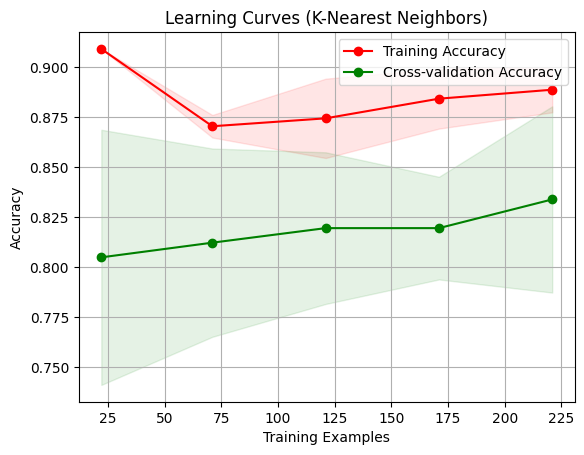

In [114]:
title = "Learning Curves (K-Nearest Neighbors)"

# Plot learning curves
plot_learning_curve(bagging_knn_model, title, X, y, cv = cv, n_jobs = -1)

plt.show()

## **Perbandingan Algoritma dalam Melakukan Klasifikasi**

### **Sebelum Bootstrapping**

In [126]:
# Buat dictionary untuk menyimpan hasil evaluasi
results = {
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest", "SVM", "KNN"],
    "Akurasi": [0.8036, 0.6786, 0.7679, 0.8214, 0.8214],
    "Precision (Kelas 0)": [0.68, 0.52, 0.62, 0.70, 0.71],
    "Precision (Kelas 1)": [0.88, 0.85, 0.90, 0.91, 0.89],
    "Recall (Kelas 0)": [0.79, 0.79, 0.84, 0.84, 0.79],
    "Recall (Kelas 1)": [0.81, 0.62, 0.73, 0.81, 0.84],
    "F1-Score (Kelas 0)": [0.73, 0.62, 0.71, 0.76, 0.75],
    "F1-Score (Kelas 1)": [0.85, 0.72, 0.81, 0.86, 0.86]
}

# Buat DataFrame dari dictionary
results_df = pd.DataFrame(results)

# Tampilkan DataFrame
results_df

,Model,Akurasi,Precision (Kelas 0),Precision (Kelas 1),Recall (Kelas 0),Recall (Kelas 1),F1-Score (Kelas 0),F1-Score (Kelas 1)
0,Logistic Regression,0.8036,0.68,0.88,0.79,0.81,0.73,0.85
1,Decision Tree,0.6786,0.52,0.85,0.79,0.62,0.62,0.72
2,Random Forest,0.7679,0.62,0.90,0.84,0.73,0.71,0.81
3,SVM,0.8214,0.70,0.91,0.84,0.81,0.76,0.86
4,KNN,0.8214,0.71,0.89,0.79,0.84,0.75,0.86


Dalam evaluasi lima algoritma machine learning, terlihat bahwa SVM dan KNN menunjukkan performa yang paling baik dengan akurasi model yang sama, yaitu sebesar 82.14%. Kedua algoritma ini memiliki keseimbangan yang baik antara precision dan recall untuk kedua kelas. SVM memiliki precision yang cukup tinggi untuk kedua kelas, sementara KNN memiliki recall yang lebih tinggi untuk kelas 1. Di sisi lain, Logistic Regression, Random Forest, dan Decision Tree menunjukkan performa yang sedikit lebih rendah dengan akurasi model masing-masing berkisar antara 67.86% hingga 80.36%. Meskipun Random Forest memiliki precision yang tinggi untuk kelas 1, namun keseimbangan antara precision dan recall tidak sebaik pada SVM dan KNN. Decision Tree menunjukkan kinerja yang lebih rendah, terutama dalam menangani kelas minoritas dengan recall yang rendah untuk kelas 1.

### **Setelah Bootstrapping**

In [125]:
# Buat dictionary untuk menyimpan hasil evaluasi
bootstrapped_results = {
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest", "SVM", "KNN"],
    "Akurasi": [0.8393, 0.7857, 0.8214, 0.8214, 0.8393],
    "Precision (Kelas 0)": [0.75, 0.64, 0.70, 0.70, 0.75],
    "Precision (Kelas 1)": [0.89, 0.90, 0.91, 0.91, 0.89],
    "Recall (Kelas 0)": [0.79, 0.84, 0.84, 0.84, 0.79],
    "Recall (Kelas 1)": [0.86, 0.76, 0.81, 0.81, 0.86],
    "F1-Score (Kelas 0)": [0.77, 0.73, 0.76, 0.76, 0.77],
    "F1-Score (Kelas 1)": [0.88, 0.82, 0.86, 0.86, 0.88]
}

# Buat DataFrame dari dictionary
bootstrapped_results_df = pd.DataFrame(bootstrapped_results)

# Tampilkan DataFrame
bootstrapped_results_df

,Model,Akurasi,Precision (Kelas 0),Precision (Kelas 1),Recall (Kelas 0),Recall (Kelas 1),F1-Score (Kelas 0),F1-Score (Kelas 1)
0,Logistic Regression,0.8393,0.75,0.89,0.79,0.86,0.77,0.88
1,Decision Tree,0.7857,0.64,0.90,0.84,0.76,0.73,0.82
2,Random Forest,0.8214,0.70,0.91,0.84,0.81,0.76,0.86
3,SVM,0.8214,0.70,0.91,0.84,0.81,0.76,0.86
4,KNN,0.8393,0.75,0.89,0.79,0.86,0.77,0.88


Berdasarkan hasil perbandingan algoritma yang telah dilakukan, terdapat lima model klasifikasi yang dievaluasi: Logistic Regression, Decision Tree, Random Forest, SVM, dan KNN. Dalam pengukuran akurasi model, diketahui bahwa hasil terbaik diperoleh oleh model Logistic Regression dan KNN, keduanya memiliki akurasi sebesar 83.93%. Model SVM juga menghasilkan akurasi yang sama dengan Logistic Regression dan KNN. Meskipun Decision Tree dan Random Forest menunjukkan akurasi yang lebih rendah, keduanya masih cukup baik dengan akurasi sekitar 78.57% dan 82.14% secara berturut-turut setelah proses bootstrapping.

Saat melihat laporan klasifikasi untuk setiap model, kita dapat mengevaluasi kinerja mereka secara lebih rinci. Logistic Regression, SVM, dan KNN menunjukkan konsistensi yang baik dalam presisi, recall, dan F1-score untuk kedua kelas. Sedangkan Decision Tree dan Random Forest memiliki performa yang sedikit lebih rendah, terutama dalam recall untuk kelas 1, menunjukkan kecenderungan untuk mengidentifikasi kelas 1 yang lebih rendah dibandingkan dengan model lainnya. Namun demikian, semua model memiliki nilai presisi yang tinggi untuk kelas 1, menunjukkan kemampuan mereka dalam mengidentifikasi kelas tersebut dengan benar.

Dengan demikian, meskipun Logistic Regression, SVM, dan KNN menunjukkan akurasi yang sama setelah proses bootstrapping, perbandingan selanjutnya menunjukkan bahwa model Logistic Regression mungkin lebih disukai karena memiliki performa yang seragam dan konsisten dalam hal presisi, recall, dan F1-score untuk kedua kelas. Namun, pemilihan model terbaik masih tergantung pada konteks spesifik dari masalah klasifikasi yang sedang dihadapi.